# Jared Waldroff

## Research question/interests

Briefly describe your research question or interests here.

1. Does having a more aggressive play style using demolitions correlate with the amount of goals a team gets.
2. Does having more shots on net correlate with more wins.
3. Will moving around the map more, give you more wins?

# Task 1

In [20]:
import pandas as pd
import seaborn as sns
from project_functions2 import load_and_process
import matplotlib.pyplot as plt

data_set = pd.read_csv('../data/raw/matches_by_teams.csv')

m3_data_set = data_set[['demo_inflicted','core_goals']]

m3_data_set


,demo_inflicted,core_goals
0,6.0,9.0
1,7.0,5.0
2,11.0,21.0
3,7.0,4.0
4,13.0,12.0
...,...,...
10589,19.0,18.0
10590,22.0,14.0
10591,15.0,5.0
10592,11.0,10.0


## Q1. Does having a more aggressive play style using demolitions correlate with the amount of goals a team gets.

#### Here I am using only the demo_inflicted & core_goals columns to see a relation.

AxesSubplot(0.1,0.15;0.8x0.75)


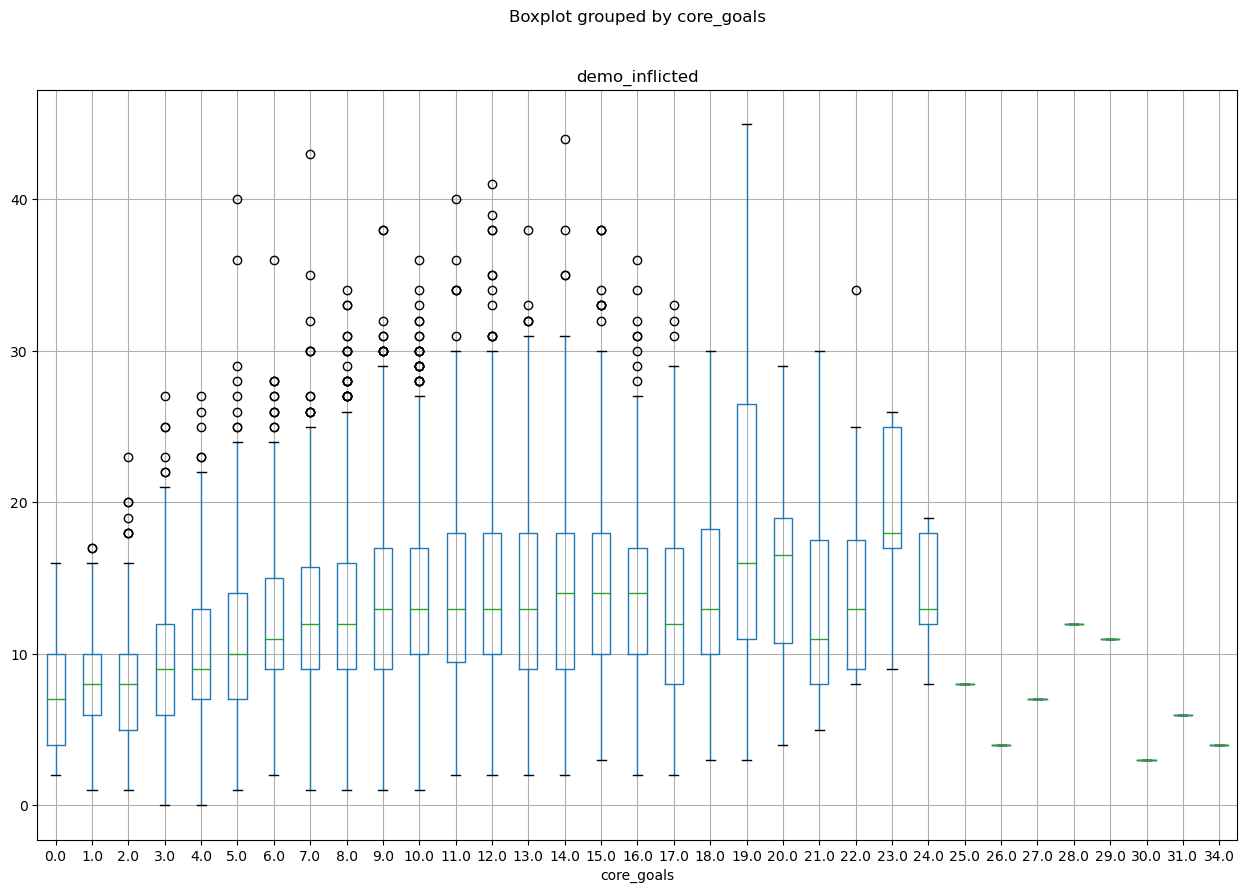

In [2]:
x = m3_data_set.boxplot('demo_inflicted','core_goals', figsize = (15,10))

print(x)

#### I can see some relation between the two with this boxplot, as the goals go up the demolitions go up. Let's try it in a different plot and see what we get.

# Demos Inflicted & Goals Scored

<seaborn.axisgrid.PairGrid object>


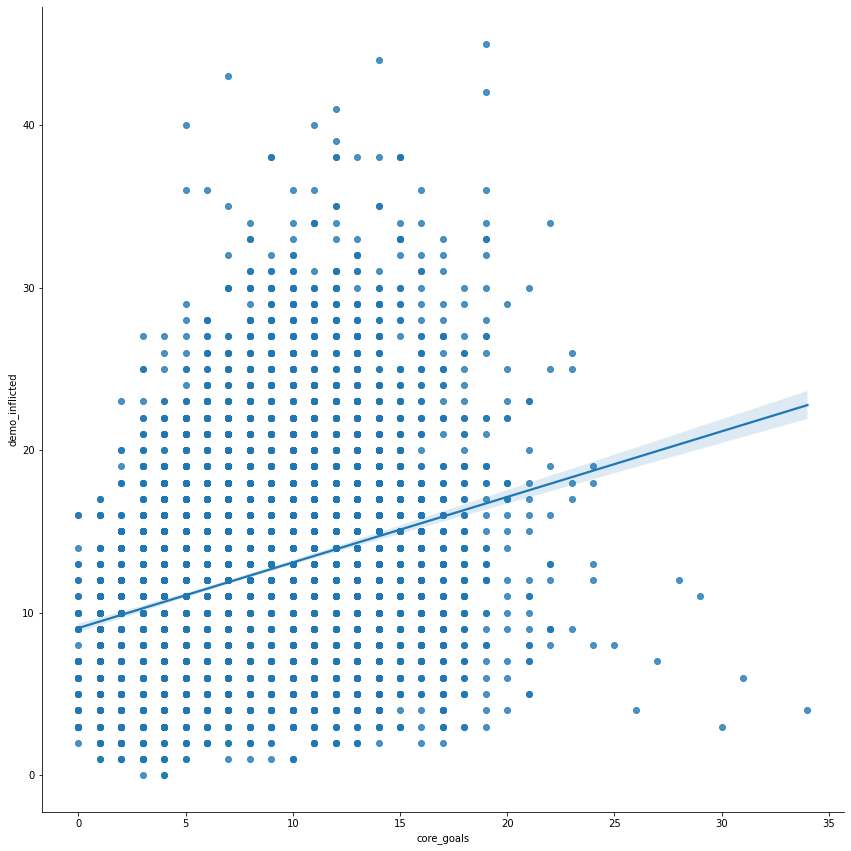

In [ ]:
y = sns.pairplot(
    m3_data_set,
    x_vars = ['core_goals'],
    y_vars = ['demo_inflicted'],
    height = 12,
    aspect = 1,
    kind = 'reg'
)

print(y)

#### Here I'm looking at goals scored vs. demolitions done against the oposing team. Based on the chart above it is shown that on average teams have 9 demolitions per game. The teams that ended up scoring the most goals did around 10 - 30 demolitions. This is showing a similar result to the previous graph.

# Demo Inflicted & Core Goals - Histograms

array([[<AxesSubplot:title={'center':'demo_inflicted'}>,
        <AxesSubplot:title={'center':'core_goals'}>]], dtype=object)

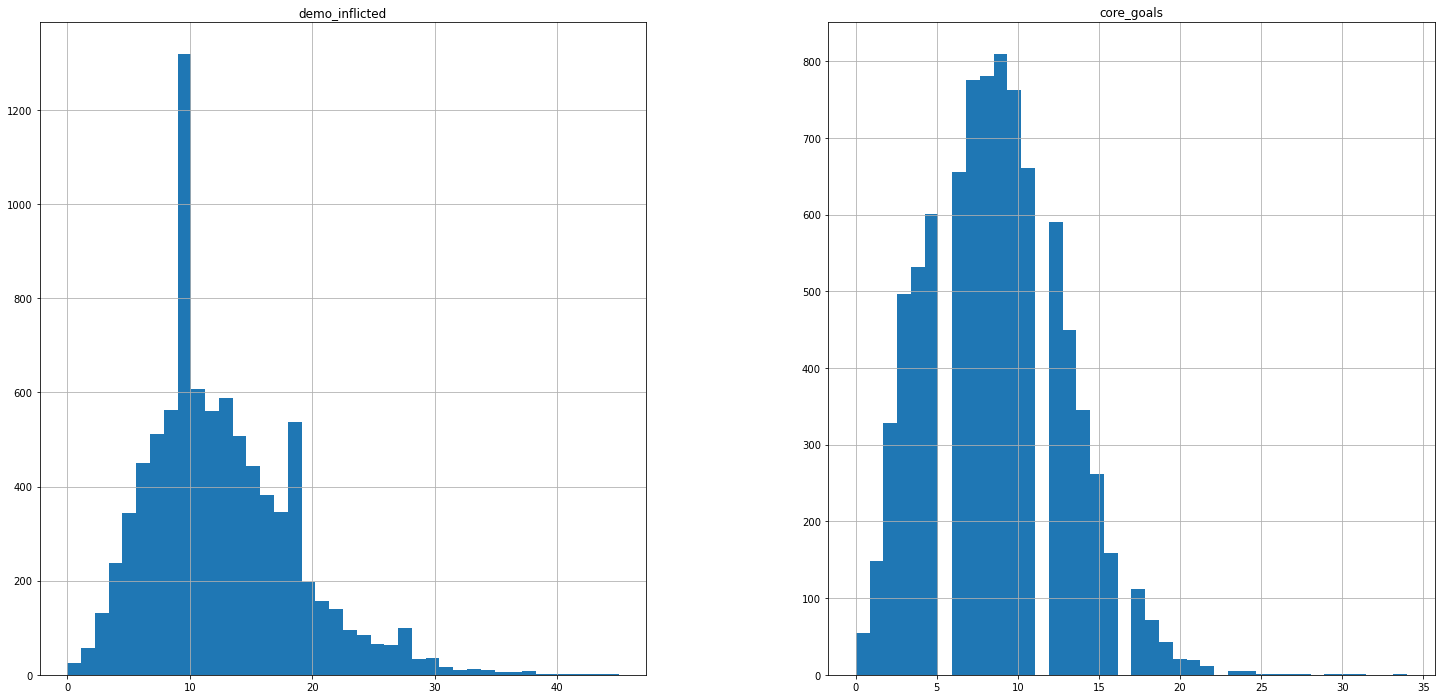

In [ ]:
m3_data_set.hist(bins=40,figsize =(25,12))

#### We see that a majority of the teams committed 9 demolitions here and scored an average of 8 goals. This may not show exactly the realtion we want as this just shows us the average numbers of what all the teams are doing.

## Q2. Does having more shots on net correlate with more wins.

<seaborn.axisgrid.JointGrid>

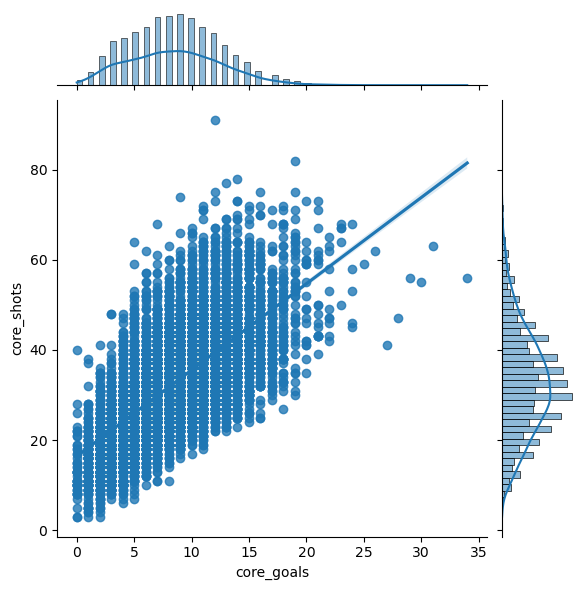

In [ ]:
sns.jointplot(x='core_goals', y='core_shots', data=data_set, kind='reg')

#### This plot above gives us a good representation of the relation between shots and goals while also showing us the average of how many shots are taken along with the number of goals.

<AxesSubplot: xlabel='core_shots', ylabel='Density'>

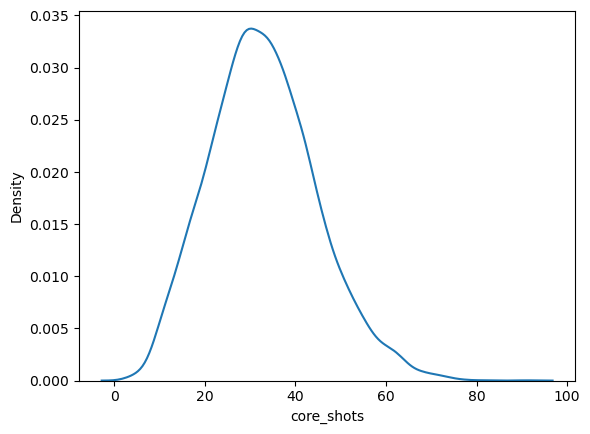

In [ ]:
sns.kdeplot(data_set['core_shots'])

<AxesSubplot: xlabel='core_goals', ylabel='Density'>

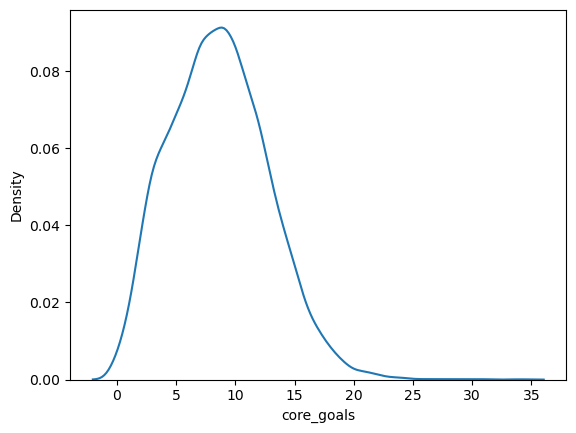

In [ ]:
sns.kdeplot(data_set['core_goals'])

#### The line graphs here show us similar to what we saw before of the average goals but also the average amount of shots which looks to be about 31.

<seaborn.axisgrid.PairGrid object>


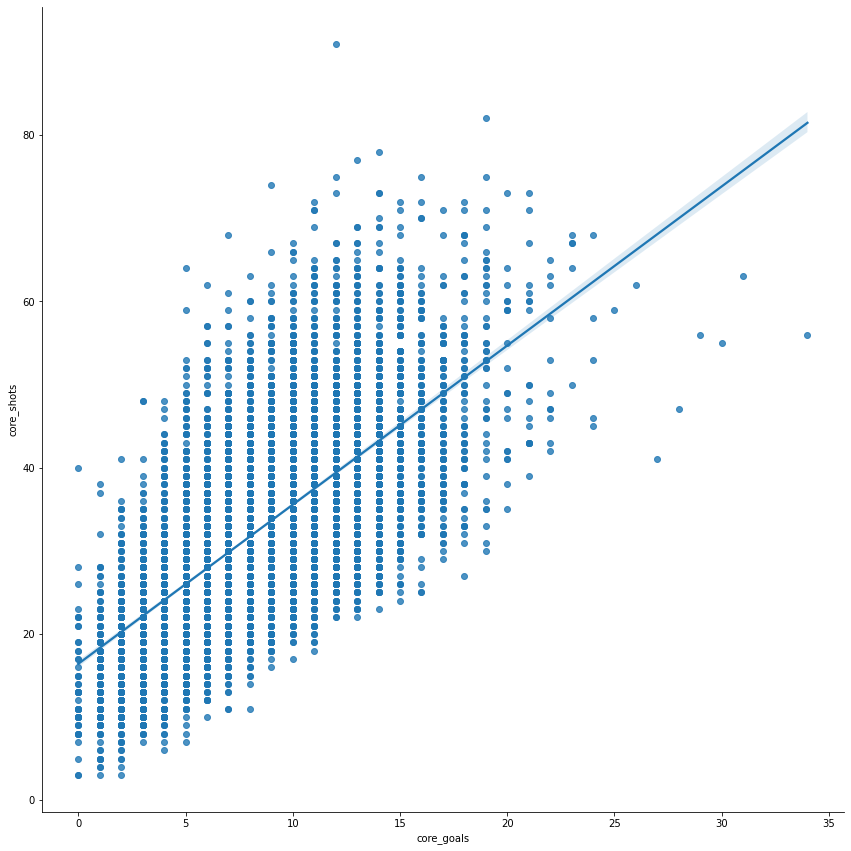

In [ ]:
z = sns.pairplot(
    data_set,
    x_vars = ['core_goals'],
    y_vars = ['core_shots'],
    height = 12,
    aspect = 1,
    kind = 'reg'
)

print(z)

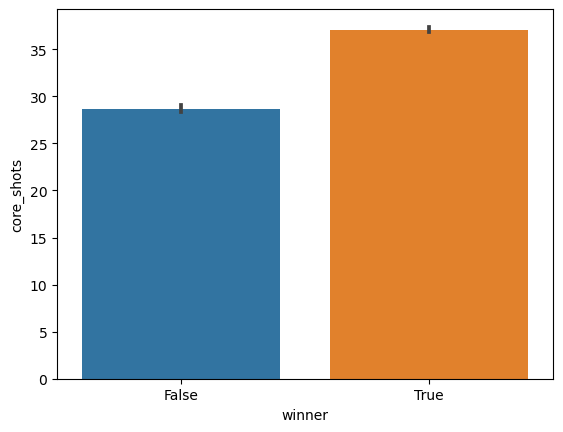

In [23]:
sns.barplot(x = 'winner', y = 'core_shots', data = data_set)


#### From this bar graph we can see that teams who take more shots will end up winning more games. This aligns with what was stated ealier on how a more agressive play style will lead to more wins.

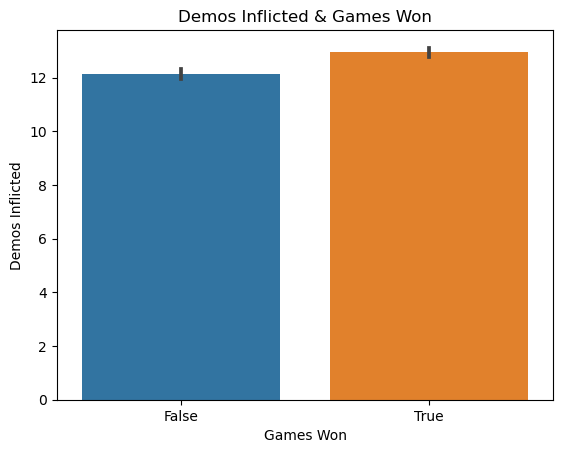

In [22]:
y = sns.barplot(x = 'winner', y = 'demo_inflicted', data = data_set).set(title="Demos Inflicted & Games Won",xlabel = 'Games Won', ylabel = 'Demos Inflicted')

y


#### This shows that teams that do more demolitions win more games. Again we see that more demolistions means more games won.

## Q3. Will moving around the map more, give you more wins?

<seaborn.axisgrid.PairGrid object>


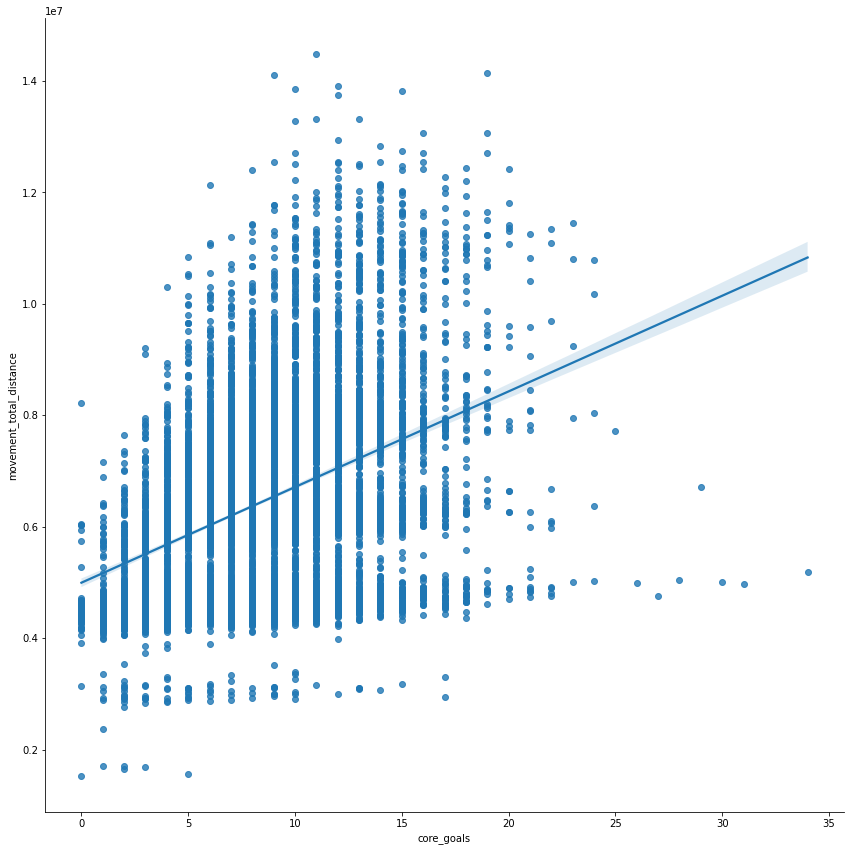

In [ ]:
b = sns.pairplot(
    data_set,
    x_vars = ['core_goals'],
    y_vars = ['movement_total_distance'],
    height = 12,
    aspect = 1,
    kind = 'reg'
)

print(b)


### I was curious about the relationship between the distance travelled and the amount of goals they scored. As seen in the above diagram it seems as though there is a direct correlation between the distance they travel and the amount of goals scored. From this analysis I can conclude that using a strategy in Rocket League that is heavily focused on taking shots on net, moving around the map as much as possible and committing more than 9 but less than 30 demolitions will result in the most goals scored.

# Task 2

In [ ]:
import pandas as pd

m3_data_set = pd.read_csv('../data/raw/matches_by_teams.csv')

clean_data = m3_data_set.drop(columns=['match_id',
            'team_id',
            'team_slug',
            'color',
            'positioning_time_neutral_third',
            'positioning_time_offensive_third',
            'positioning_time_defensive_half',
            'positioning_time_offensive_half',
            'movement_time_powerslide',
            'positioning_time_defensive_third',
            'positioning_time_behind_ball',
            'positioning_time_in_front_ball',
            'movement_time_slow_speed',
            'movement_time_ground',
            'movement_time_low_air',
            'boost_time_boost_75_100',
            'core_score',
            'core_shooting_percentage',
            'movement_time_boost_speed',
            'boost_amount_stolen_big',
            'boost_amount_stolen_small',
            'boost_amount_collected_small',
            'boost_amount_stolen',
            'boost_bpm',
            'boost_bcpm',
            'boost_avg_amount',
            'boost_amount_collected',
            'boost_count_collected_big',
            'boost_count_collected_small',
            'boost_count_stolen_small',
            'boost_count_stolen_big',
            'boost_amount_collected_big',
            'boost_amount_overfill',
            'boost_amount_overfill_stolen',
            'boost_amount_used_while_supersonic',
            'boost_time_boost_0_25',
            'boost_time_boost_25_50',
            'boost_time_boost_50_75',
            'boost_time_zero_boost'
])

clean_data_remove_columns = clean_data.dropna()

clean_data_change_names = clean_data_remove_columns.rename(columns={
    'team_name':'Team Name',
    'team_region':'Team Region',
    'core_shots':'Shots',
    'core_goals':'Goals',
    'core_saves':'Saves',
    'core_assists':'Assists',
    'boost_time_full_boost':'Time at Full Boost',
    'movement_total_distance':'Total Distance Moved',
    'movement_time_supersonic_speed':'Time at Supersonic Speed',
    'movement_time_high_air':'Time in High Air',
    'movement_count_powerslide':'Powerslide Distance',
    'demo_inflicted':'Demos Inflicted',
    'demo_taken':'Demos Taken',
    'score':'Score',
    'winner':'Winner'
})

clean_data_change_names



,Team Name,Team Region,Shots,Goals,Saves,Assists,Time at Full Boost,Total Distance Moved,Time at Supersonic Speed,Time in High Air,Powerslide Distance,Demos Inflicted,Demos Taken,Score,Winner
0,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,7.0,370.91,4694698.0,578.77,210.83,840.0,6.0,7.0,3.0,True
1,RANGA ROUNDUP,Oceania,15.0,5.0,21.0,3.0,313.00,4774768.0,614.48,175.53,702.0,7.0,6.0,0.0,False
2,RENEGADES,Oceania,46.0,21.0,10.0,21.0,311.35,5098012.0,600.10,238.28,767.0,11.0,7.0,3.0,True
3,TRIDENT ESPORTS,Oceania,16.0,4.0,16.0,3.0,278.31,4893312.0,542.23,174.47,551.0,7.0,11.0,0.0,False
4,DIRE WOLVES,Oceania,46.0,12.0,13.0,9.0,796.05,6680885.0,644.94,290.85,1020.0,13.0,8.0,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10589,TEAM BDS,Europe,61.0,18.0,29.0,14.0,688.01,10010525.0,1011.67,523.30,1017.0,19.0,13.0,4.0,True
10590,G2 ESPORTS,North America,46.0,14.0,38.0,12.0,554.70,9022216.0,1023.51,485.48,1594.0,22.0,15.0,4.0,True
10591,FAZE CLAN,North America,50.0,5.0,26.0,4.0,620.84,8961362.0,963.24,459.89,1440.0,15.0,22.0,2.0,False
10592,TEAM BDS,Europe,36.0,10.0,19.0,8.0,488.50,7387374.0,731.29,355.54,793.0,11.0,21.0,4.0,True


# Task 3 - Step 1

In [ ]:
import pandas as pd
import numpy as np

df = (
    pd.DataFrame(data = pd.read_csv('../data/raw/matches_by_teams.csv'))
    .drop(columns = [
        'match_id',
        'team_id',
        'team_slug',
        'color',
        'positioning_time_neutral_third',
        'positioning_time_offensive_third',
        'positioning_time_defensive_half',
        'positioning_time_offensive_half',
        'movement_time_powerslide',
        'positioning_time_defensive_third',
        'positioning_time_behind_ball',
        'positioning_time_in_front_ball',
        'movement_time_slow_speed',
        'movement_time_ground',
        'movement_time_low_air',
        'boost_time_boost_75_100',
        'core_score',
        'core_shooting_percentage',
        'movement_time_boost_speed',
        'boost_amount_stolen_big',
        'boost_amount_stolen_small',
        'boost_amount_collected_small',
        'boost_amount_stolen',
        'boost_bpm',
        'boost_bcpm',
        'boost_avg_amount',
        'boost_amount_collected',
        'boost_count_collected_big',
        'boost_count_collected_small',
        'boost_count_stolen_small',
        'boost_count_stolen_big',
        'boost_amount_collected_big',
        'boost_amount_overfill',
        'boost_amount_overfill_stolen',
        'boost_amount_used_while_supersonic',
        'boost_time_boost_0_25',
        'boost_time_boost_25_50',
        'boost_time_boost_50_75',
        'boost_time_zero_boost'
    ])
    .assign(DemosPerGoal=lambda x: x.demo_inflicted / x.core_goals).round(2)
    .assign(ShotsPerGoal=lambda x: x.core_shots / x.core_goals).round(2)
    .rename(columns = {
        'team_name':'Team Name',
        'team_region':'Team Region',
        'core_shots':'Shots',
        'core_goals':'Goals',
        'core_saves':'Saves',
        'core_assists':'Assists',
        'boost_time_full_boost':'Time at Full Boost',
        'movement_total_distance':'Total Distance Moved',
        'movement_time_supersonic_speed':'Time at Supersonic Speed',
        'movement_time_high_air':'Time in High Air',
        'movement_count_powerslide':'Powerslide Distance',
        'demo_inflicted':'Demos Inflicted',
        'demo_taken':'Demos Taken',
        'score':'Score',
        'winner':'Winner',
        'DemosPerGoal':'Demos Per Goal'
    })
    .dropna(how='any',axis=0)
)
            
df

df.to_csv('data.csv')

# Task 3 - Part 2

In [ ]:
def load_and_process(path):
                     
    # Method Chain 1 (Load data and deal with missing data)
                     
    df1 = (
        pd.read_csv(path)
        .rename(columns = {
            'team_name':'Team Name',
            'team_region':'Team Region',
            'core_shots':'Shots',
            # 'core_goals':'Goals',
            'core_saves':'Saves',
            'core_assists':'Assists',
            'boost_time_full_boost':'Time at Full Boost',
            'movement_total_distance':'Total Distance Moved',
            'movement_time_supersonic_speed':'Time at Supersonic Speed',
            'movement_time_high_air':'Time in High Air',
            'movement_count_powerslide':'Powerslide Distance',
            # 'demo_inflicted':'Demos Inflicted',
            'demo_taken':'Demos Taken',
            'score':'Score',
            'winner':'Winner',
            'DemosPerGoal':'Demos Per Goal'
        })
        .dropna(how='any',axis=0)
          )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1
        .assign(DemosPerGoal=lambda x: x.demo_inflicted / x.core_goals).round(2)
        .assign(ShotsPerGoal=lambda x: x.Shots / x.core_goals).round(2)
        .drop(columns = [
            'match_id',
            'team_id',
            'team_slug',
            'color',
            'positioning_time_neutral_third',
            'positioning_time_offensive_third',
            'positioning_time_defensive_half',
            'positioning_time_offensive_half',
            'movement_time_powerslide',
            'positioning_time_defensive_third',
            'positioning_time_behind_ball',
            'positioning_time_in_front_ball',
            'movement_time_slow_speed',
            'movement_time_ground',
            'movement_time_low_air',
            'boost_time_boost_75_100',
            'core_score',
            'core_shooting_percentage',
            'movement_time_boost_speed',
            'boost_amount_stolen_big',
            'boost_amount_stolen_small',
            'boost_amount_collected_small',
            'boost_amount_stolen',
            'boost_bpm',
            'boost_bcpm',
            'boost_avg_amount',
            'boost_amount_collected',
            'boost_count_collected_big',
            'boost_count_collected_small',
            'boost_count_stolen_small',
            'boost_count_stolen_big',
            'boost_amount_collected_big',
            'boost_amount_overfill',
            'boost_amount_overfill_stolen',
            'boost_amount_used_while_supersonic',
            'boost_time_boost_0_25',
            'boost_time_boost_25_50',
            'boost_time_boost_50_75',
            'boost_time_zero_boost'])
        .rename(columns = {
            'core_goals':'Goals',
            'demo_inflicted':'Demos Inflicted',
            'DemosPerGoal':'Demos Per Goal',
            'ShotsPerGoal':'Shots Per Goal'})
        
      )

    # Rreturn the latest dataframe

    return df2 

In [ ]:
load_and_process('../data/raw/matches_by_teams.csv')


,Team Name,Team Region,Shots,Goals,Saves,Assists,Time at Full Boost,Total Distance Moved,Time at Supersonic Speed,Time in High Air,Powerslide Distance,Demos Inflicted,Demos Taken,Score,Winner,Demos Per Goal,Shots Per Goal
0,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,7.0,370.91,4694698.0,578.77,210.83,840.0,6.0,7.0,3.0,True,0.67,3.78
1,RANGA ROUNDUP,Oceania,15.0,5.0,21.0,3.0,313.00,4774768.0,614.48,175.53,702.0,7.0,6.0,0.0,False,1.40,3.00
2,RENEGADES,Oceania,46.0,21.0,10.0,21.0,311.35,5098012.0,600.10,238.28,767.0,11.0,7.0,3.0,True,0.52,2.19
3,TRIDENT ESPORTS,Oceania,16.0,4.0,16.0,3.0,278.31,4893312.0,542.23,174.47,551.0,7.0,11.0,0.0,False,1.75,4.00
4,DIRE WOLVES,Oceania,46.0,12.0,13.0,9.0,796.05,6680885.0,644.94,290.85,1020.0,13.0,8.0,3.0,True,1.08,3.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10589,TEAM BDS,Europe,61.0,18.0,29.0,14.0,688.01,10010525.0,1011.67,523.30,1017.0,19.0,13.0,4.0,True,1.06,3.39
10590,G2 ESPORTS,North America,46.0,14.0,38.0,12.0,554.70,9022216.0,1023.51,485.48,1594.0,22.0,15.0,4.0,True,1.57,3.29
10591,FAZE CLAN,North America,50.0,5.0,26.0,4.0,620.84,8961362.0,963.24,459.89,1440.0,15.0,22.0,2.0,False,3.00,10.00
10592,TEAM BDS,Europe,36.0,10.0,19.0,8.0,488.50,7387374.0,731.29,355.54,793.0,11.0,21.0,4.0,True,1.10,3.60


# Task 3 - Part 3

## Uploaded  & Imported Project Function 2

# Task 4

## Does having a more aggressive play style using demolitions correlate with the amount of goals a team gets?

<seaborn.axisgrid.PairGrid object>


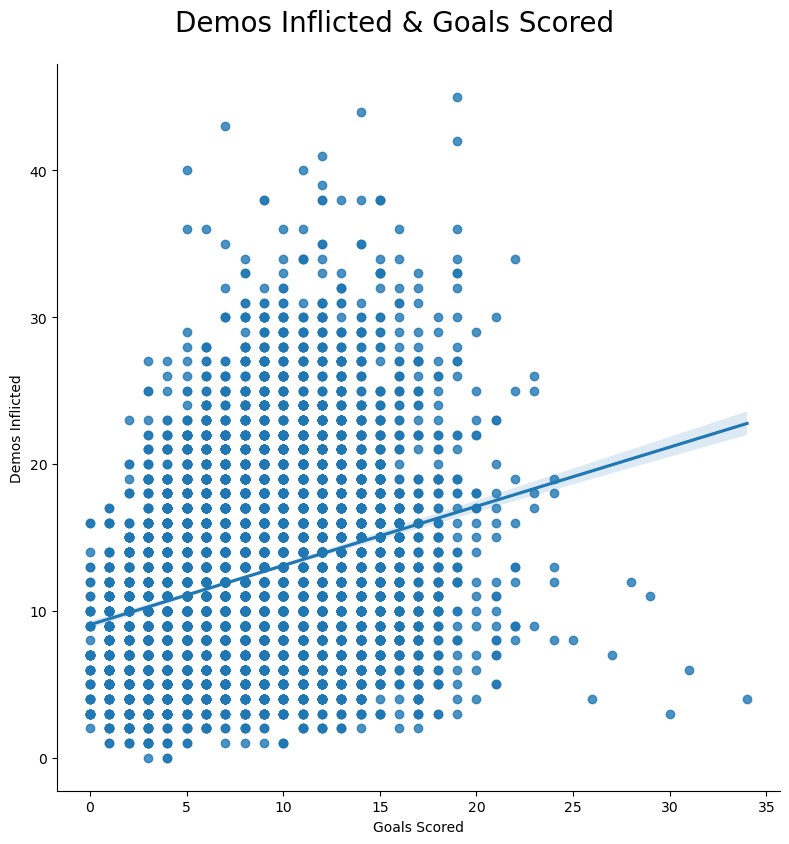

In [ ]:
y = sns.pairplot(
    m3_data_set,
    x_vars = ['core_goals'],
    y_vars = ['demo_inflicted'],
    height = 8,
    aspect = 1,
    kind = 'reg'
)

y.fig.suptitle("Demos Inflicted & Goals Scored", y = 1.05, fontsize = 20)

y.set(xlabel = 'Goals Scored', ylabel = 'Demos Inflicted')

print(y)

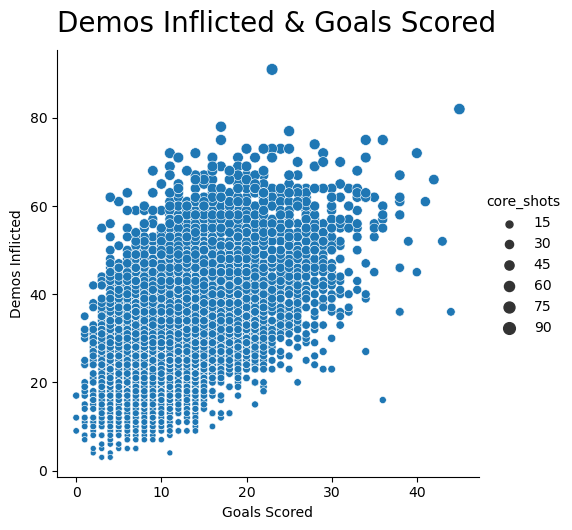

In [4]:
z = sns.relplot(data = data_set, x = 'demo_inflicted', y = 'core_shots', size = 'core_shots')

z.fig.suptitle("Demos Inflicted & Goals Scored", y = 1.05, fontsize = 20)

z.set(xlabel = 'Goals Scored', ylabel = 'Demos Inflicted')

z




### Looking at the data above I was able to see the relation of an agressive play style using demolitions to score goals in game. I noticed that on average most teams had 9 demolitions a game with 0 goals. Once teams got up to 20 goals their demolitions also increased to 15. This aggressive play style of commiting more demolitions correlates with an increase in the number of goals scored. This is yes to the first question.

## Does having more shots on net correlate with more goals scored?

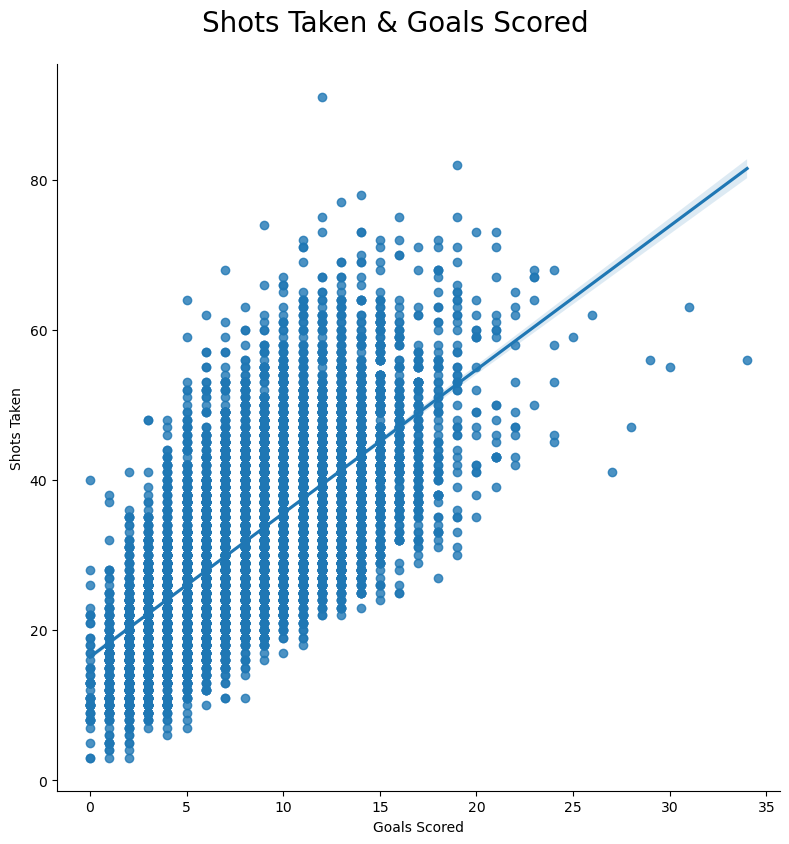

In [8]:
z = sns.pairplot(
    data_set,
    x_vars = ['core_goals'],
    y_vars = ['core_shots'],
    height = 8,
    aspect = 1,
    kind = 'reg'
)

z.fig.suptitle("Shots Taken & Goals Scored", y = 1.05, fontsize = 20)
z.set(xlabel = 'Goals Scored', ylabel = 'Shots Taken')

print(z)



AxesSubplot(0.125,0.11;0.775x0.77)


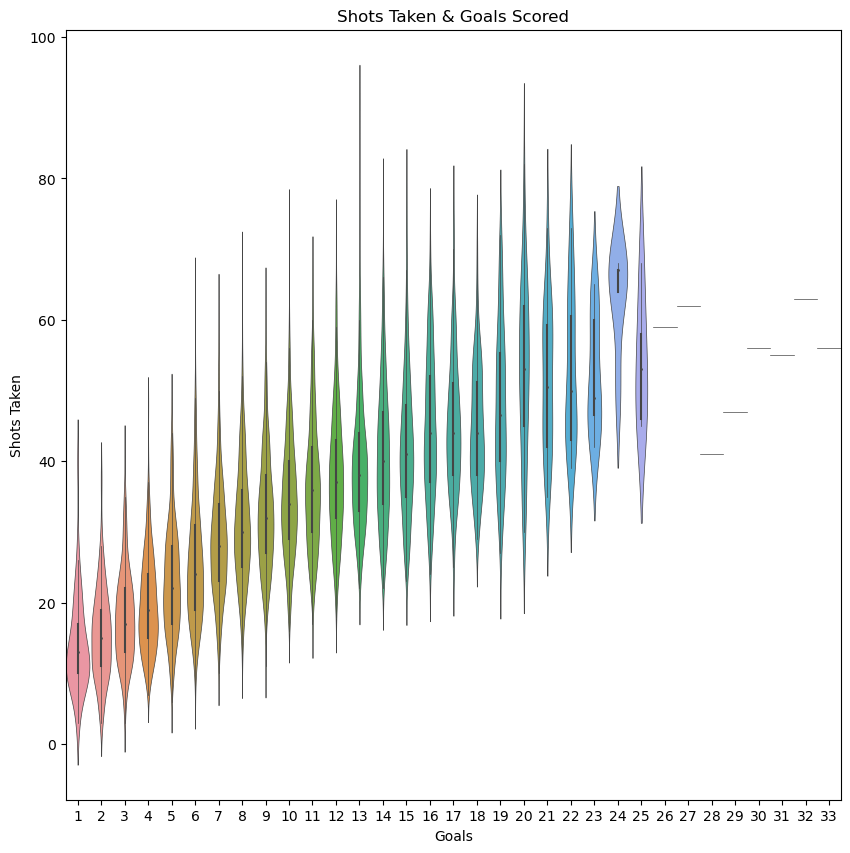

<Figure size 1500x1500 with 0 Axes>

In [16]:
plt.figure(figsize=(10,10))

z = sns.violinplot(
    data_set,
    x = 'core_goals',
    y = 'core_shots', split=True, inner="box", linewidth=0.5,
    width = 1
)
# ['hist', 'kde', 'ecdf']

z.set(xlabel = 'Goals', ylabel = 'Shots Taken', title = 'Shots Taken & Goals Scored')
z.set_xticklabels(['1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33'])
plt.figure(figsize=(15,15))
# z.fig.suptitle("Shots Taken & Goals Scored", y = 1.05, fontsize = 40)
# z.set(xlabel = 'Goals Scored', ylabel = 'Shots Taken')

print(z)

plt.savefig('jared_3.jpg')

### I decided that it would be a good idea to look at shots and how that may affect a team's ability to score goals. The 2 diagrams above compare shots on net and goals scored. These state that on average it takes a team about 19 shots to score 1 goal. Once the number of goals gets to 20 the number of shots taken on net is 50. The number of goals a team gets is directely correlated with the number of shots taken. This states that the answer to the second question is yes.